Tugas Week 1 MBC

#**Data Import and Data Understanding**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [25]:
y_train.shape

(60000,)

In [26]:
y_test.shape

(10000,)

In [32]:
first_image = x_train[0]

In [ ]:
first_image

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
plt.imshow(first_image)

#**Data Preparation**

##Encoding

In [18]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_train[0]

In [24]:
y_cat_train.shape

(60000, 10)

In [22]:
y_cat_test = to_categorical(y_test)

In [23]:
y_cat_test.shape

(10000, 10)

##Data Normalization

In [27]:
x_train = x_train / 255
x_test = x_test / 255

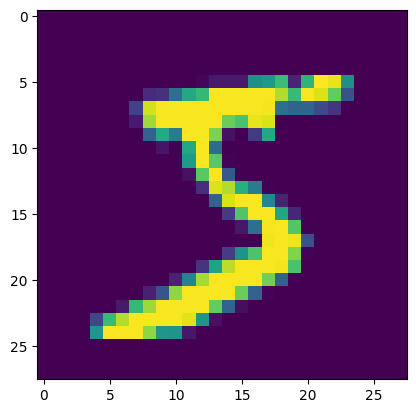

In [31]:
plt.imshow(x_train[0])

##Re Shape

In [34]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [35]:
x_train.shape

(60000, 28, 28, 1)

In [36]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [37]:
x_test.shape

(10000, 28, 28, 1)

#**Membangun Arsitektur CNN**

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


In [79]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [81]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [82]:
model.fit(x_train, y_cat_train, epochs = 25, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8669 - loss: 0.4326 - val_accuracy: 0.9802 - val_loss: 0.0629
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9666 - loss: 0.1113 - val_accuracy: 0.9857 - val_loss: 0.0422
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9756 - loss: 0.0795 - val_accuracy: 0.9867 - val_loss: 0.0398
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9803 - loss: 0.0632 - val_accuracy: 0.9879 - val_loss: 0.0356
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9818 - loss: 0.0540 - val_accuracy: 0.9889 - val_loss: 0.0320
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9835 - loss: 0.0502 - val_accuracy: 0.9898 - val_loss: 0.0327
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9852 - loss: 0.0464 - val_accuracy: 0.9912 - val_loss: 0.0314
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9871 -

In [75]:
model.metrics_names

['loss', 'compile_metrics']

In [83]:
model.evaluate(x_test, y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9876 - loss: 0.0453


[0.035168733447790146, 0.9904000163078308]

In [85]:
losses = pd.DataFrame(model.history.history)

In [86]:
losses

,accuracy,loss,val_accuracy,val_loss
0,0.929433,0.236839,0.9802,0.062942
1,0.969383,0.102515,0.9857,0.042249
2,0.975583,0.078816,0.9867,0.039787
3,0.979333,0.066825,0.9879,0.035626
4,0.982033,0.056071,0.9889,0.032001
5,0.983733,0.051610,0.9898,0.032707
6,0.985100,0.046272,0.9912,0.031427
7,0.987050,0.041626,0.9906,0.029757
8,0.987283,0.039055,0.9902,0.034226
9,0.988000,0.036975,0.9902,0.032988


In [ ]:
losses[['loss', 'val_loss']].plot()

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()

In [89]:
# Simpan model dalam format HDF5
model.save('mnist_model.h5')


In [90]:
from google.colab import files
files.download('mnist_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>